<a href="https://colab.research.google.com/github/davidias0090/Cluster/blob/main/Davi_Dias_Recomendador_de_musicas_online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Introdução

Quem nunca notou como as músicas que ouvimos no modo aleatório em aplicativos de música parecem estar longe de ser aleatórias? Já pensou como um aplicativo pode nos recomendar uma música com tanta precisão? E não é só com apps de música ou streaming; até em vídeos, como quando um serviço sugere “Se você gostou deste filme, talvez goste de outros” ou o YouTube oferece “Vídeos relacionados ao lado”.

Como esses algoritmos funcionam? Como eles definem e geram essas recomendações? Nesta aula, vamos explorar como construir um sistema de recomendação de músicas utilizando coletados a partir de uma API disponibilizado pelo Spotify.




[Spotify API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)

## 1.1 Dicionário dos dados

Os dados necessários para desenvolver todo o nosso trabalho foram retirados da API do Spotify e já foram previamente tratados.

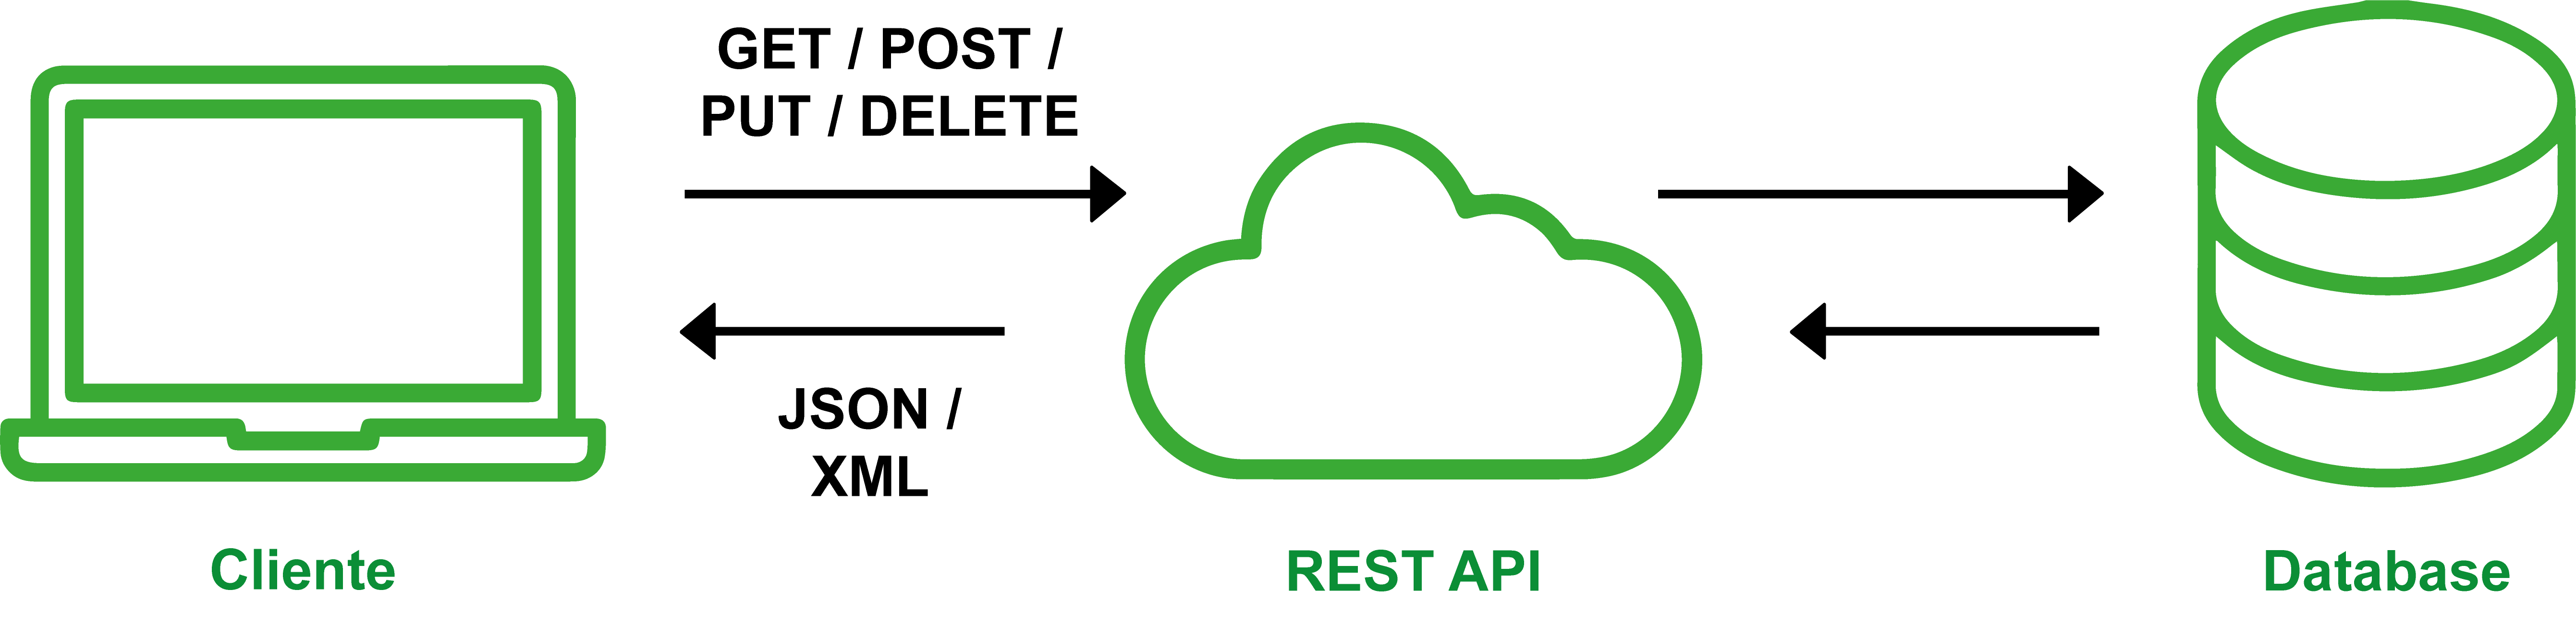

É importante conhecer o básico sobre os conceitos de retirada dos dados. API é a abreviação para Application Programming Interface, que em uma tradução livre pode ser Interface de Programação de Aplicação. Ela funciona como um atalho para o banco de dados, com uma série de padrões e protocolos e a API do Spotify funciona utilizando os princípios REST, que nos retornam arquivos json com os metadados das informações requeridas, como artista, música, álbum e faixa, que são retirados diretamente do catálogo do Spotify.



* `Acousticness/Acústica:` Variável numérica, medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

* `Danceability/Dançabilidade:` Variável numérica, a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.

* `Duration_ms:`Variável numérica, a duração da trilha em milissegundos.

* `Duration_min:` Variável numérica, a duração da faixa em minutos.

* `Energy/Energia:` Variável numérica, Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

* `Explicit/Explícito:` Variável categórica, se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

* `Id:` O ID do Spotify para a faixa.

* `Instrumentalness/Instrumentalidade:` Variável numérica, prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

* `Key/Chave:`Variável numérica, a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo. 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

* `Liveness/ Ao vivo:` Variável numérica, detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

* `Loudness/ Volume em dB:` Variável numérica, volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

* `Mode/ Modo:` Variável numérica, o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

* `Popularity/Popularidade:` Variável numérica, a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

* `Speechiness/Fala:` Variável numérica, a fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

* `Tempo:` Variável numérica, Tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

* `Valence/Valência:` Variável numérica, Medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada).

* `Year/Ano:` Ano em que a música foi lançada.

## 1.2 Analise dos dados

### Importando e vizualindo dados

Obs.: crie um repositório no seu github (dados_totais, dados_generos e dados_anos)

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np

# urls
url_total = 'https://raw.githubusercontent.com/davidias0090/Cluster/main/Dados_totais.csv'
url_genres = 'https://raw.githubusercontent.com/davidias0090/Cluster/main/data_by_genres.csv'
url_year = 'https://raw.githubusercontent.com/davidias0090/Cluster/main/data_by_year.csv'

# leitura dos dados
db_total = pd.read_csv(url_total)
db_year = pd.read_csv(url_year)
db_genres = pd.read_csv(url_genres)

In [2]:
db_total.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,0,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,1,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,0,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.543,2000,0.00664,3 Doors Down,0.545,233933,0.865,0,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,1,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


In [3]:
db_year.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [4]:
db_genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


### Verificando o tipo dos dados e seus valores

In [5]:
db_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20311 entries, 0 to 20310
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           20311 non-null  float64
 1   year              20311 non-null  int64  
 2   acousticness      20311 non-null  float64
 3   artists           20311 non-null  object 
 4   danceability      20311 non-null  float64
 5   duration_ms       20311 non-null  int64  
 6   energy            20311 non-null  float64
 7   explicit          20311 non-null  int64  
 8   id                20311 non-null  object 
 9   instrumentalness  20311 non-null  float64
 10  key               20311 non-null  int64  
 11  liveness          20311 non-null  float64
 12  loudness          20311 non-null  float64
 13  mode              20311 non-null  int64  
 14  name              20311 non-null  object 
 15  popularity        20311 non-null  int64  
 16  speechiness       20311 non-null  float6

In [ ]:
db_year.info()

In [ ]:
db_genres.info()

### Vrificando a existência de dados Null e NaN

In [ ]:
db_total.isnull().sum()

In [ ]:
db_year.isnull().sum()

In [ ]:
db_genres.isnull().sum()

## 1.3 Análise gráfica

### Análise temporal (dados_anos)

Use o código seguinte para plotar a variação de algumas features ao longo dos anos.



```
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['acousticness'],
                    name='Acousticness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['speechiness'],
                    name='Speechiness'))

fig.show()

```

In [7]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=db_year['year'], y=db_year['acousticness'],
                    name='Acousticness'))
fig.add_trace(go.Scatter(x=db_year['year'], y=db_year['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=db_year['year'], y=db_year['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=db_year['year'], y=db_year['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=db_year['year'], y=db_year['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=db_year['year'], y=db_year['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=db_year['year'], y=db_year['speechiness'],
                    name='Speechiness'))

fig.show()

### Análise de Correlação de Features



```
import plotly.express as px
fig = px.imshow(dados_gerais.drop(['artists', 'id', 'name', 'artists_song'],axis=1).corr(), text_auto=True)
fig.show()
```


In [9]:
import plotly.express as px
fig = px.imshow(db_total.drop(['artists', 'id', 'name', 'artists_song'],axis=1).corr(), text_auto=True)
fig.show()

# 2 - Clusterização (agrupamento)

Quando lidamos com um problema de agrupamento, queremos usar um algoritmo que descubra grupos significativos nos dados, como é o nosso caso, queremos criar agrupamentos de músicas. Seja para qualquer outro fim, o algoritmo descobre os grupos sem intervenções externas, já que não precisa de rótulos para realizar previsões.

Um algoritmo clássico de clusterização é o K-means, que tenta organizar os dados em um número k de clusters (grupos), que definimos iicialmente, e, a partir disso, ele identifica os pontos de dados semelhantes e vai criando agrupamentos, tentando distanciar cada cluster o máximo possível. O cálculo das semelhanças é feito utilizando a distância euclidiana ou uma linha reta comum entre dois pontos. Quanto menor a distância euclidiana, mais próximo os dois pontos estão e mais semelhantes eles são por consequência.

O processo de como o K-means funciona é relativamente simples e repetitivo.

1.  O usuário define o valor de clusters (k);
2.  O K-means seleciona um ponto aleatório para cada centróide, temos k-centróides nesse ponto, e um centróide é o ponto em torno do qual cada cluster é construído;
3. A distância euclidiana é calculada entre cada ponto e cada centróide, e, a partir disto, cada ponto será atribuído a um centróide (mais próximo com base na distância euclidiana);
4. O algoritmo calcula a média da distância euclidiana entre cada ponto do cluster e o centróide para definir um novo centróide;
5. O processo 4 se repete até que os centróides dos clusters não se movam mais.

Veja a uma animação de como esse processo acontece no [K-Means Clustering Demo.](https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/)


## 2 - Clusterização por gênero

In [ ]:
#visualize o dataset dados_genero

In [10]:
db_genres

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


### 2.1 PCA e SdandardScaler

O K-means não consegue resolver problemas com escalas diferentes e também não consegue agrupar com precisão dados de alta dimensionalidade (muitas features)

Para a primeira parte, em relação às escalas, é necessário que todos estejam na mesma escala de [0,1], caso contrário, ele colocará maior peso em variáveis que têm variâncias maiores e esses recursos terão maior influência na forma final do cluster.

Em relação à alta dimensionalidade, o algoritmo usa a distância euclidiana para determinar a associação de agrupamento, porém, quando temos uma alta dimensionalidade, pares de pontos começarão a ter distâncias muito semelhantes e não conseguiremos obter agrupamentos significativos. Para reduzir a quantidade de dados podemos utilizar a técnica chamada Análise de Componentes Principais (PCA).

PCA é um método clássico usado para reduzir dados de alta dimensionalidade para um espaço de baixa dimensão. Em outras palavras, simplesmente não podemos visualizar com precisão conjuntos de dados de alta dimensão, porque não podemos visualizar nada acima de 3 dimensões (3D). Um dos principais objetivos do PCA é transformar conjuntos de dados com mais de 3 dimensões (alta dimensão) em gráficos tipicamente 2D ou 3D. Essa ação é o que chamamos de espaço de baixa dimensão.

Mesmo fazendo toda a redução de n dimensões existentes para 2D, no nosso caso, ainda conseguimos reter a maior parte da informação necessária do conjunto de dados de alta dimensão, ou seja, a informação foi “espremida” até caber em 2 dimensões.

Então, as informações que eram contidas em n dimensões passam a estar em 2 componentes principais (PC). O primeiro PC contém a maioria das informações dos recursos originais, o segundo PC conterá a próxima maior quantidade de informações, e, caso tivéssemos mais PC 's, seria essa mesma sequência, sendo os PC’s não correlacionados entre si, o que significa que cada um guarda informações únicas.

Usando os dois módulos de auxílio, a padronização dos dados com o StandardScaler e a redução de dimensionalidade com o PCA, quando necessário, os resultados obtidos com o K-Means serão melhores do que apenas aplicar ele diretamente nos dados.

#### Pipeline

Agora vamos utilizar vários conceitos em um processo de pipeline. Então a primeira coisa que vamos fazer é importar o método **Pipeline** do [sklearn.pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) e esse método faz literalmente uma pipeline de machine learning, mas de uma forma automática, onde aplica sequencialmente uma lista de transformações até um resultado final. Então o que precisamos passar é o que a nossa pipeline vai fazer, como o primeiro passo e o que queremos de resultado final dela.

Neste ponto precisamos reduzir a dimensionalidade da tabela que está com várias colunas, porém se utilizarmos um processo de redução diretamente, sem fazer a padronização dos dados na parte de pré processamento, os resultados ficarão totalmente desbalanceados, trazendo maior peso para as variáveis que têm uma amplitude maior, como por exemplo o loudness em relação às outras variáveis que compõem a música.

Para resolver esse problema, o primeiro passo da pipeline vai ser usar o [**StandardScaler**](https://scikit-learn.org/stable/modules/preprocessing.html) para trazer essa padronização e redução de escala para que no próximo passo seja feita a redução de dimensionalidade com um método de decomposição, no nosso caso vamos escolher o
PCA.

PCA significa Análise de componentes principais e ele trás consigo uma série de análises matemáticas que são feitas para que possamos transformar aquelas milhares de colunas que temos em uma quantidade menor, com um valor n que escolhermos, porém, quanto mais colunas a gente tem no dataset original e menos colunas queremos no dataset final, o aprendizado depois pode ser prejudicado.

Na parte **n_components** podemos colocar a quantidade de % de explicação que queremos que o algoritmo tenha no final, como por exemplo 0.3, que seria 30%, ou um valor como por exemplo um valor X de colunas.


Depois de feita a pipeline, vamos salvar em um arquivo chamado projection, com as colunas x e y, que são as posições dos pontos na cluster.


```
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

SEED = 1224
np.random.seed(1224)

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))])
genre_embedding_pca = pca_pipeline.fit_transform(dados_generos.drop("genres", axis=1))
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding_pca)
projection

```



In [ ]:
#execute o código acima

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

SEED = 1224
np.random.seed(1224)

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))])
genre_embedding_pca = pca_pipeline.fit_transform(db_genres.drop("genres", axis=1))
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding_pca)
projection

,x,y
0,5.913028,-0.022739
1,2.808443,4.521471
2,-0.753649,-1.297776
3,1.017765,-0.948859
4,0.754944,-1.036756
...,...,...
2968,-0.513290,-0.044401
2969,-3.144862,-1.129388
2970,-0.787237,-1.129867
2971,1.637212,-3.431213


2.2 K-Means

Depois que já fizemos a padronização com StandardScaler, ea redução da dimensionalidade com o PCA, precisamos entender o que aqueles dados estão nos mostrando. Então, temos todos os nossos dados com X e Y no projection, porém, o que eu faço com eles, ploto para onde, o que eles estão me mostrando?

E agora, precisamos aplicar um modelo de machine learning, porém, não temos nenhuma label, nenhum rótulo falando a qual grupo cada dado pertence. E é um pouco complicado de entendermos o que está acontecendo, não conseguimos agrupá-las sem ter esse rótulo, utilizando um método convencional, digamos assim, de machine learning, utilizando um método de classificação normal.

Então, podemos utilizar um método não supervisionado, já que os supervisionados não cabem nesse tipo de problema. Um método não supervisionado, não temos esses rótulos mesmo, só vamos passar os dados para a máquina, e ela vai nos dizer onde ela acha que cada dado se encaixa, onde eles estão mais perto, onde eles estão mais longe. E um modelo de cluster funciona da mesma forma. Então, a clusterizaçao vai agrupando os dados conforme a semelhança entre eles.



Como vamos utilizar o K-Means, a primeira coisa que vamos fazer é importá-lo da biblioteca SKLearn.  Vamos declarar kmeans_pca = KMeans(n_clusters=5, verbose=True, random_state=SEED). Dentro dos parâmetros que vamos passar, eu vou passar n_clusters=5, e verbose=True, que mostra como o algoritmo está funcionando Depois fazemos um kmeans_pca.fit(projection).

Na base dados_generos, eu quero que ele salve qual cluster cada gênero é. Então, dentro do projection, eu quero que ele faça dados_generos[‘cluster_pca’] = kmeans_pca.predict(projection), ou seja, vamos uma coluna dentro de dados_generos, chamada cluster_pca, com a identificação do cluster.Depois, vamos colocar em projection uma nova coluna chamada cluster_pca, então, além de ter o X e o Y na tabela que vamos ter, vamos ter uma nova coluna chamada cluster_pca



```
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=5, verbose=True, random_state=SEED)

kmeans_pca.fit(projection)

dados_generos['cluster_pca'] = kmeans_pca.predict(projection)
projection['cluster_pca'] = kmeans_pca.predict(projection)

```

Vamos também salvar dentro do projection uma coluna chamada generos, para ficar masi fácil de identificar a qual cluster pertence cada gênero


```
# projection['generos'] = dados_generos['genres']
```



In [12]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=5, verbose=True, random_state=SEED)

kmeans_pca.fit(projection)

db_genres['cluster_pca'] = kmeans_pca.predict(projection)
projection['cluster_pca'] = kmeans_pca.predict(projection)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 4783.810195287566.
Iteration 1, inertia 4184.2278964578645.
Iteration 2, inertia 3809.090477844979.
Iteration 3, inertia 3658.151761947493.
Iteration 4, inertia 3599.8463186407616.
Iteration 5, inertia 3566.536004508932.
Iteration 6, inertia 3551.458682121422.
Iteration 7, inertia 3543.5677229748644.
Iteration 8, inertia 3539.240120728414.
Iteration 9, inertia 3537.2011362623794.
Iteration 10, inertia 3536.6225925915674.
Iteration 11, inertia 3536.308106188235.
Converged at iteration 11: center shift 0.00010054309969495486 within tolerance 0.0002721724414302225.
Initialization complete
Iteration 0, inertia 4510.55208049388.
Iteration 1, inertia 3924.012628623194.
Iteration 2, inertia 3840.962307337054.
Iteration 3, inertia 3769.5857782784674.
Iteration 4, inertia 3723.198763538407.
Iteration 5, inertia 3688.2092949001976.
Iteration 6, inertia 3663.550278662935.
Iteration 7, inertia 3646.8602741653785.
Iteration 8, inertia 3634.7977897055102.

In [13]:
projection['generos'] = db_genres['genres']

### 2.3 Plotando a clustering



```
fig = px.scatter(
   projection, x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'generos'])
fig.show()
```





In [14]:
fig = px.scatter(
   projection, x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'generos'])
fig.show()

### 2.4 Avaliando

Uma forma de avaliarmos se a cluster foi bem separada ou não, é utilizarmos um 'explained variance do PCA', para vermos o quanto nossas variáveis estão sendo explicadas dentro dessa nossa cluster.

```
pca_pipeline[1].explained_variance_ratio_.sum()
pca_pipeline[1].explained_variance_.sum()
```






In [15]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.4187268329695728

In [16]:
pca_pipeline[1].explained_variance_.sum()

5.4452804062722135

## 2.2 - Clusterização por música

Repita as etapas anteriores para base dados_gerais. Atenção, para essa base será necessário utilizar a conversão OneHotEnconder previamente.

In [17]:
db_total.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,0,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,1,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,0,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.543,2000,0.00664,3 Doors Down,0.545,233933,0.865,0,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,1,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


Utilize o onehotenconder para transormtar a coluna de 'artists' em dado numericos

In [18]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [19]:
x = db_total

In [20]:
one_hot = OneHotEncoder(drop = 'if_binary')
transformer = make_column_transformer(
    (one_hot, ['artists']),
    remainder='passthrough',
    sparse_threshold=0)

transformer.fit_transform(x)

array([[0.0, 0.0, 0.0, ..., 0.0281, 173.372, 'Coldplay - Yellow'],
       [0.0, 0.0, 0.0, ..., 0.269, 94.948, 'OutKast - Ms. Jackson'],
       [0.0, 0.0, 0.0, ..., 0.0584, 105.143, 'Linkin Park - In the End'],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0249, 103.054, 'Fleet Foxes - Sunblind'],
       [0.0, 0.0, 0.0, ..., 0.258, 120.08,
        'Gunna - NASTY GIRL / ON CAMERA'],
       [0.0, 0.0, 0.0, ..., 0.308, 75.055, 'Eminem - Darkness']],
      dtype=object)

In [21]:
x = transformer.fit_transform(db_total)
colunas = transformer.get_feature_names_out()
x_one_hot = pd.DataFrame(x, columns = colunas)

In [22]:
x_one_hot.head()

,onehotencoder__artists_$NOT,onehotencoder__artists_$uicideBoy$,onehotencoder__artists_*NSYNC,onehotencoder__artists_2 Chainz,onehotencoder__artists_21 Savage,onehotencoder__artists_2Pac,onehotencoder__artists_3 Doors Down,onehotencoder__artists_311,onehotencoder__artists_3OH!3,onehotencoder__artists_5 Seconds of Summer,...,remainder__instrumentalness,remainder__key,remainder__liveness,remainder__loudness,remainder__mode,remainder__name,remainder__popularity,remainder__speechiness,remainder__tempo,remainder__artists_song
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000121,11,0.234,-7.227,1,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4,0.0771,-5.946,0,Ms. Jackson,80,0.269,94.948,OutKast - Ms. Jackson
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3,0.209,-5.87,0,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000011,11,0.168,-5.708,0,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5,0.0454,-4.244,0,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


### Padronização e Redução de dimensionalidade em pipeline

Atenção, crie um pipeline removendo as colunas:
'artists_song', 'id','name','artists_song', "explicit", "key", "mode"

In [23]:
x_one_hot.head()

,onehotencoder__artists_$NOT,onehotencoder__artists_$uicideBoy$,onehotencoder__artists_*NSYNC,onehotencoder__artists_2 Chainz,onehotencoder__artists_21 Savage,onehotencoder__artists_2Pac,onehotencoder__artists_3 Doors Down,onehotencoder__artists_311,onehotencoder__artists_3OH!3,onehotencoder__artists_5 Seconds of Summer,...,remainder__instrumentalness,remainder__key,remainder__liveness,remainder__loudness,remainder__mode,remainder__name,remainder__popularity,remainder__speechiness,remainder__tempo,remainder__artists_song
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000121,11,0.234,-7.227,1,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4,0.0771,-5.946,0,Ms. Jackson,80,0.269,94.948,OutKast - Ms. Jackson
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3,0.209,-5.87,0,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000011,11,0.168,-5.708,0,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5,0.0454,-4.244,0,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


In [24]:
x_one_hot = x_one_hot.drop(['remainder__artists_song', 'remainder__id','remainder__name', "remainder__explicit", "remainder__key", "remainder__mode"], axis=1)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

SEED = 1224
np.random.seed(1224)

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))])
genre_embedding_pca = pca_pipeline.fit_transform(x_one_hot)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding_pca)
projection

,x,y
0,0.174774,0.740817
1,-1.358444,0.061820
2,-0.972329,0.650443
3,-0.927215,1.296152
4,-1.709719,-0.403909
...,...,...
20306,1.348546,-2.777767
20307,1.269003,-2.422756
20308,0.781561,-1.181677
20309,0.001806,-3.036453


### Aplicação do cluster com K-Means

In [26]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=7, verbose=True, random_state=SEED)

kmeans_pca.fit(projection)

db_total['cluster_pca'] = kmeans_pca.predict(projection)
projection['cluster_pca'] = kmeans_pca.predict(projection)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 26516.62058781573.
Iteration 1, inertia 23317.41929203234.
Iteration 2, inertia 22433.765840619155.
Iteration 3, inertia 21958.904551438904.
Iteration 4, inertia 21676.065639308.
Iteration 5, inertia 21497.232174862842.
Iteration 6, inertia 21386.182828272915.
Iteration 7, inertia 21314.31437506269.
Iteration 8, inertia 21265.68074530881.
Iteration 9, inertia 21228.24204192003.
Iteration 10, inertia 21206.139720618554.
Iteration 11, inertia 21190.848071559656.
Iteration 12, inertia 21181.980595188375.
Iteration 13, inertia 21176.47196645573.
Iteration 14, inertia 21173.052580533178.
Iteration 15, inertia 21170.755209440784.
Iteration 16, inertia 21168.90159020561.
Converged at iteration 16: center shift 0.00023898932051231097 within tolerance 0.00032114827909722753.
Initialization complete
Iteration 0, inertia 27466.918135165794.
Iteration 1, inertia 22059.961462556344.
Iteration 2, inertia 21655.555956638073.
Iteration 3, inertia 21547.5698

In [27]:
projection['artists'] = db_total['artists']

### Plotando o cluster

In [28]:
fig = px.scatter(
   projection, x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'artists'])
fig.show()

### Avaliando o cluster

In [29]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.007241223880431936

In [30]:
pca_pipeline[1].explained_variance_.sum()

6.4232818284035105

# 3 - Sistemas de Recomendação

Faremos na aula de sexta! (: